In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(seed=24601),
                  get_y=parent_label)

mnist_dls = mnist.dataloaders(path/'training', bs=1000)

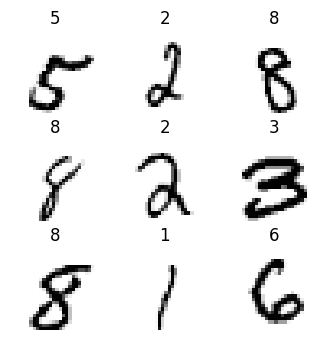

In [ ]:
mnist_dls.show_batch(max_n=9, figsize=(4,4)) #This is a sample of the things we want to label

In [ ]:
cnn = sequential(
    nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(8),
    nn.Conv2d(8,16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(16),
    nn.Conv2d(16,32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Conv2d(32,64, kernel_size=3, stride=2, padding=1),
    Flatten()
)

In [ ]:
learn = Learner(mnist_dls, cnn, loss_func=F.cross_entropy, metrics=accuracy)

In [ ]:
learn.lr_find()

In [ ]:
learn.fit(30, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.596071,2.406939,0.097500,00:54
1,2.603423,2.091760,0.404250,00:47
2,1.997982,1.345540,0.545333,00:46
3,1.391245,0.862880,0.736000,00:48
4,0.977193,0.670809,0.803083,00:47
5,0.742770,0.569193,0.834000,00:49
6,0.604178,0.501823,0.854833,00:47
7,0.514959,0.450242,0.869917,00:47
8,0.452915,0.409695,0.880750,00:48
9,0.407358,0.378267,0.891583,00:47


#NOTES

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(seed=24601),
                  get_y=parent_label)

mnist_dls = mnist.dataloaders(path/'training', bs=1000)

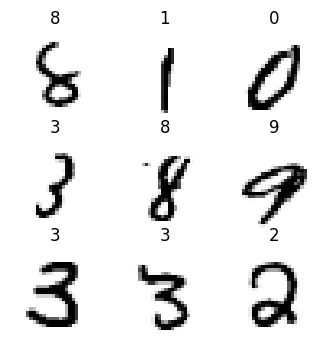

In [ ]:
mnist_dls.show_batch(max_n=9, figsize=(4,4)) #This is a sample of the things we want to label

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)


*stride* controls the stride for the cross-correlation, a single number or a tuple.

*padding* controls the amount of padding applied to the input. It can be either a string {‘valid’, ‘same’} or an int / a tuple of ints giving the amount of implicit padding applied on both sides.

*dilation* controls the spacing between the kernel points; also known as the à trous algorithm. It is harder to describe, but this link has a nice visualization of what dilation does.

*groups* controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups. For example,

At groups=1, all inputs are convolved to all outputs.

At groups=2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels and producing half the output channels, and both subsequently concatenated.

At groups= in_channels, each input channel is convolved with its own set of filters (of size
out_channels
in_channels
in_channels
out_channels
​
 ).

**Parameters**

in_channels (int) – Number of channels in the input image

out_channels (int) – Number of channels produced by the convolution

kernel_size (int or tuple) – Size of the convolving kernel

stride (int or tuple, optional) – Stride of the convolution. Default: 1

padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0

dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1

groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1

bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

padding_mode (str, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

In [ ]:
m = nn.ReLU() #DOES NOT PERFORM A RELU, all this does is creates "m" and makes it a ReLU function

m(torch.tensor(-2)) #now it does relu stuff

tensor(0)

BatchNorm2d() performs batch normalization

Essentially this is where you have some neural network

Input --> Layer1 ---> Layer2 ---> Output

Now imagine Layer 1 produces outputs which are all negative numbers, if we use a ReLU this will turn all ReLU outputs to 0 which isnt very useful

What if instead we made the bias some huge number in the billions, this would make the output of our ReLU essentially be = to the bias and >0, but this also makes the ReLU do essentially nothing since all the values are now extremely similar. This would create a function that doesn't kill any of our inputs, keeping our data linear WHICH IS A REALLY BAD THING

* We need a balance between positive and negative inputs to ReLU (or whatever activation) to make our function non-linear

BatchNorm(x) is X - (mean value of X)/(Std of X)

- This brings our mean to a value close to 0 and also compacts the numbers into a reasonably sized range

In [ ]:


cnn = sequential(#This works sequentially, so it reads this line by line

    #nn.Conv2d(1 input, number of filters, kernel size, stride, padding)

    #filters can be like the colors we use on the image for example

    nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(8), ##Batch norm with the number of filters
    nn.Conv2d(8,16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(16),
    nn.Conv2d(16,32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Conv2d(32,64, kernel_size=3, stride=2, padding=1),
    Flatten()
)


A convolution is like going over an image with a window and sliding along the image so the only part of the image you can see is with that window, instead of doing an analysis at every single pixel/point with that window, slide has us skip a certain amount of points/pixels and move our window to after that stride

* this has a few advantages, like lower training times, and better chances to not overfit

* But it also means we perform less training on the CNN, so it may be less accurate

In [ ]:
#Now we make a learner

learn = Learner (mnist_dls, cnn, loss_func= F.cross_entropy, metrics = accuracy)

In [ ]:
learn.summary() #(Input shape (# of inputs which is basically batch size, 1 represents the grayscale, length of image, width of image))

#This eventually flattens our image into a csv file with 1000 images and 256 columns (each column represents one pixel)
#if you were to imagine each pixel of an image being turned into columns, then each image is represented by a row



Sequential (Input shape: 1000 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     1000 x 8 x 14 x 14  
Conv2d                                    80         True      
ReLU                                                           
BatchNorm2d                               16         True      
____________________________________________________________________________
                     1000 x 16 x 7 x 7   
Conv2d                                    1168       True      
ReLU                                                           
BatchNorm2d                               32         True      
____________________________________________________________________________
                     1000 x 32 x 4 x 4   
Conv2d                                    4640       True      
ReLU                                                           
BatchNorm2d                               64         True      
___________________________________

In [ ]:
learn.lr_find() #USE GPU FOR THIS!!!!!

KeyboardInterrupt: 

In [ ]:
learn.fit(10, 1e-3) #Our null is probably around 10 percent since theres 10 numbers

#So we need our accuracy to be above 10 for there to be any chance that it works

epoch,train_loss,valid_loss,accuracy,time


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7be3b3b944c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
Exception ignored in:   File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
<function _MultiProcessingDataLoaderIter.__del__ at 0x7be3b3b944c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a

KeyboardInterrupt: 

f()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 212, in <lambda>
    self.schedule(lambda : self._really_send(*args, **kwargs))
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 228, in _really_send
    ctx.term()
  File "/usr/local/lib/python3.10/dist-packages/zmq/sugar/context.py", line 217, in term
    super().term()
  File "zmq/backend/cython/context.pyx", line 83, in zmq.backend.cython.context.Context.term
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt
